In [1]:
import numpy as np

def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        #yield best, fitness[best_idx]
        yield min_b + pop*diff,fitness,best_idx

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

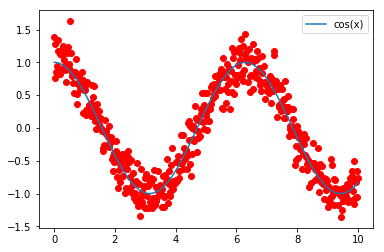

In [3]:
x = np.linspace(0,10,500)
y = np.cos(x)+np.random.normal(0,0.2,500)
plt.scatter(x,y,color="r")
plt.plot(x,np.cos(x),label="cos(x)")
plt.legend()
plt.show()

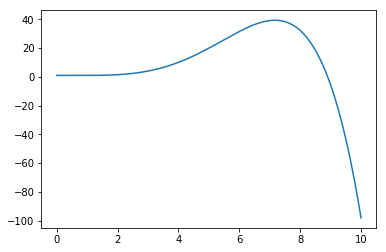

In [4]:
def fmodel(x,w):
    return w[0]+w[1]*x+w[2]*x**2+w[3]*x**3+w[4]*x**4+w[5]*x**5

plt.plot(x,fmodel(x,[1.0,-0.01,0.01,-0.1,0.1,-0.01]))
plt.show()


In [5]:
def rmse(w):
    y_pred =fmodel(x,w)
    return np.sqrt(sum((y-y_pred)**2)/len(y))
result = list(de(rmse,[(-5,5)]*6,its=2000))


In [6]:
result

[(array([[-0.87766138,  0.50382347, -1.0256445 , -2.34755235,  4.2541734 ,
          -1.96570635],
         [-2.87658869,  0.06258838, -4.70705128, -3.93294476, -2.02426772,
           0.13958418],
         [ 3.69238116, -1.23195009,  1.62713643, -4.8309708 , -4.16647751,
           0.55019609],
         [ 2.56354508, -1.04541242, -4.38539256, -0.39052731,  1.0209172 ,
          -1.44891559],
         [ 3.52028974,  1.79456439,  1.15275958,  1.34027079,  1.79262381,
          -0.58500952],
         [ 3.97680062,  0.57602897,  1.06734351,  0.33182975, -4.92952377,
           2.47754   ],
         [ 4.37536231,  2.50425833,  2.10087355, -2.63287251, -2.72403124,
           4.85891134],
         [-3.9721173 ,  1.78135685,  3.4770903 , -5.        , -0.25006965,
           3.6491598 ],
         [ 3.25086475, -2.35755964, -4.54678896,  4.59465245, -0.01264433,
           0.59287882],
         [ 0.93399631, -2.05167899,  0.29953649, -1.9693956 ,  1.45743429,
           0.50973434],
         [

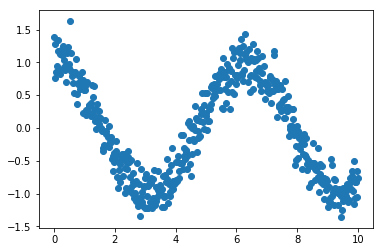

In [7]:
plt.scatter(x,y)

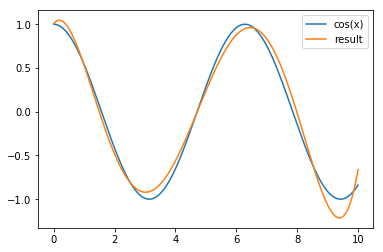

In [8]:
plt.plot(x, np.cos(x),label="cos(x)")
plt.plot(x,fmodel(x,[1.00495112,  0.45796761, -1.37483088,  0.50508182, -0.06444705, 0.00270625]),label="result")
plt.legend()

In [9]:
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.pyplot as plt

def de2(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        #yield best, fitness[best_idx]
        yield min_b + pop*diff,fitness,best_idx

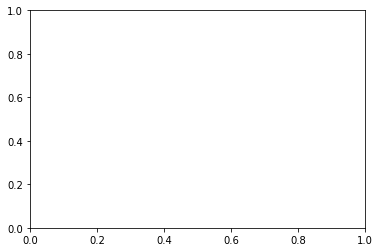

In [10]:
result = list(de2(rmse,[(-5,5)]*6,its=2000))
fig,ax =plt.subplots()
def animate(i):
    ax.clear()
    ax.set_ylim([-2,2])
    ax.scatter(x,y)
    pop,fit,idx =result[i]
    for ind in pop:
        data =fmodel(x,ind)
        ax.plot(x,data,alpha=0.3)
            

In [16]:
anim = animation.FuncAnimation(fig,animate,frames=2000,interval=20)


In [17]:
HTML(anim.to_html5_video())

ValueError: Invalid file object: <_io.BufferedReader name=55>